In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


## [Problem 5-3]

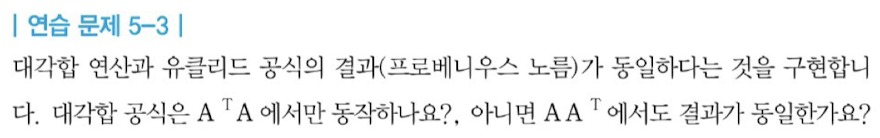

1. **Trace**
2. **Frobenius norm**: $\| A \|_F = \sqrt{\sum_{i=1}^{M} \sum_{j=1}^{N} a_{ij}^2}
$

대각합 공식: $A'A$의 trace는 동일한 행에 대한 내적이니까, Frobenius norm과 동일
- 그럼 $AA'$는? -> 아마 동일할듯

In [2]:
A = np.random.randn(4, 4)
A

array([[ 1.69120322, -0.89068231,  0.67259843,  0.65297461],
       [-1.01113714, -0.42915678,  0.29038955, -1.26299987],
       [ 0.16395864,  0.89425841,  1.02980276, -0.3935531 ],
       [-0.37719708,  2.44943998, -0.77782427, -1.78842188]])

In [3]:
A_fnorm = np.linalg.norm(A, ord='fro')
A_fnorm

4.405198288488349

In [4]:
At_A = A.T @ A
A_At = A @ A.T

In [5]:
print(f'1. np.linalg.norm(A, ord=\'fro\') = {A_fnorm}\n2. np.sqrt(At_A.trace()) = {np.sqrt(At_A.trace())}\n3. np.sqrt(A_At.trace()) = {np.sqrt(A_At.trace())}')

1. np.linalg.norm(A, ord='fro') = 4.405198288488349
2. np.sqrt(At_A.trace()) = 4.405198288488349
3. np.sqrt(A_At.trace()) = 4.405198288488349


**결론**: $||A||_F = tr(A'A) = tr(AA') $

## [Problem 5-4]

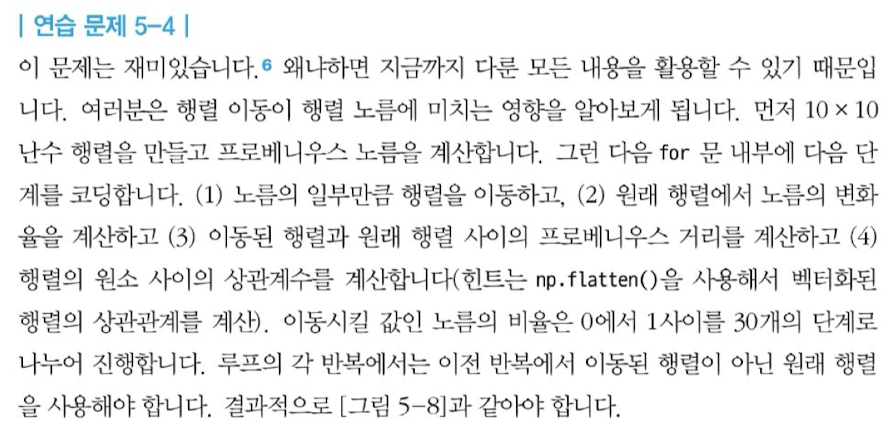

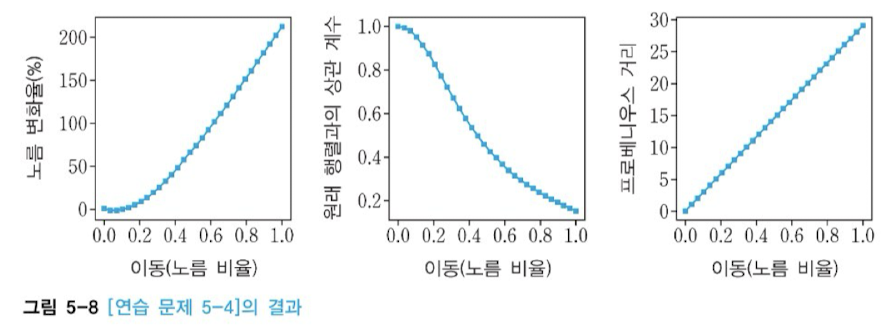

### 10x10 Random matrix L2-norm

In [6]:
X = np.random.randn(10, 10)
X

array([[-0.02645174,  0.84579571, -1.61118407,  0.64254589, -1.94105225,
         2.01799034, -0.60696498,  1.93919036,  0.21009621, -1.97998137],
       [-0.43619181,  0.90554303, -0.92429528, -0.41306059, -0.62397969,
        -0.27971716,  1.07400415, -0.14198605, -1.01241689, -1.18794342],
       [-0.96409613,  0.84630847, -1.27521084,  0.55055422, -0.45143262,
         0.88581441,  0.088643  , -0.30904767,  0.76203302,  0.40240714],
       [-0.87077957, -0.61445759, -0.2251405 ,  0.47399264, -1.2135523 ,
         0.13769057, -1.18914676, -0.3008917 , -0.50452622,  0.86833267],
       [ 0.09353677, -0.33583327, -0.92710231,  0.30190767,  1.82552434,
        -1.50048568, -0.14021998, -1.05943417, -0.49659334,  0.96613964],
       [ 0.84994101, -1.14034707, -0.83924831,  2.20959224,  0.7603428 ,
         0.5712976 , -0.40099209, -0.21627053,  2.45906449, -0.52524197],
       [-0.82410071, -0.96350968, -0.03532973, -0.86939771, -0.44833038,
        -1.49511736, -1.76857451, -0.21628772

In [7]:
X_norm = np.linalg.norm(X, ord='fro')
X_norm

10.069895691758514

### (1) Norm의 일부만큼 행렬 이동
- 0에서 1사이를 30 단계로 나눠서 진행

In [8]:
step = np.linspace(0, 1, 30) # 이걸 까먹었네
step

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

In [9]:
X_shifting = []

for i in step:
  X_shifting.append(X - i * np.eye(X.shape[0]))

X_shifting

[array([[-0.02645174,  0.84579571, -1.61118407,  0.64254589, -1.94105225,
          2.01799034, -0.60696498,  1.93919036,  0.21009621, -1.97998137],
        [-0.43619181,  0.90554303, -0.92429528, -0.41306059, -0.62397969,
         -0.27971716,  1.07400415, -0.14198605, -1.01241689, -1.18794342],
        [-0.96409613,  0.84630847, -1.27521084,  0.55055422, -0.45143262,
          0.88581441,  0.088643  , -0.30904767,  0.76203302,  0.40240714],
        [-0.87077957, -0.61445759, -0.2251405 ,  0.47399264, -1.2135523 ,
          0.13769057, -1.18914676, -0.3008917 , -0.50452622,  0.86833267],
        [ 0.09353677, -0.33583327, -0.92710231,  0.30190767,  1.82552434,
         -1.50048568, -0.14021998, -1.05943417, -0.49659334,  0.96613964],
        [ 0.84994101, -1.14034707, -0.83924831,  2.20959224,  0.7603428 ,
          0.5712976 , -0.40099209, -0.21627053,  2.45906449, -0.52524197],
        [-0.82410071, -0.96350968, -0.03532973, -0.86939771, -0.44833038,
         -1.49511736, -1.7685745

### (2) 기존 행렬에서 Norm의 변화율 계산

In [10]:
norm_2 = []
for i in (X_shifting):
  norm_2.append(np.linalg.norm(i, ord='fro'))

norm_change = (norm_2 - X_norm)/ X_norm
norm_change

array([0.00000000e+00, 7.32942685e-05, 2.63820235e-04, 5.71510929e-04,
       9.96258309e-04, 1.53791344e-03, 2.19628678e-03, 2.97114847e-03,
       3.86222876e-03, 4.86921848e-03, 5.99176956e-03, 7.22949563e-03,
       8.58197264e-03, 1.00487397e-02, 1.16292995e-02, 1.33231198e-02,
       1.51296335e-02, 1.70482401e-02, 1.90783066e-02, 2.12191681e-02,
       2.34701295e-02, 2.58304660e-02, 2.82994244e-02, 3.08762242e-02,
       3.35600589e-02, 3.63500969e-02, 3.92454828e-02, 4.22453387e-02,
       4.53487651e-02, 4.85548425e-02])

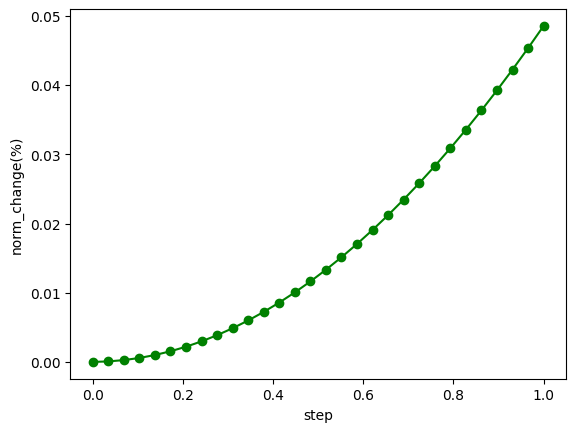

In [11]:
plt.plot(step, norm_change, 'go-')
plt.xlabel('step')
plt.ylabel('norm_change(%)')
plt.show()

### (3) Shifting matrix와 기존 matrix 사이의 frobenius distance 계산

In [12]:
fro_dist = []
for i in X_shifting:
  fro_dist.append(np.linalg.norm(X - i))

fro_dist

[0.0,
 0.10904405724718555,
 0.2180881144943709,
 0.3271321717415564,
 0.436176228988742,
 0.5452202862359276,
 0.6542643434831129,
 0.7633084007302984,
 0.872352457977484,
 0.9813965152246694,
 1.090440572471855,
 1.1994846297190405,
 1.3085286869662258,
 1.4175727442134116,
 1.5266168014605968,
 1.6356608587077823,
 1.7447049159549677,
 1.8537489732021533,
 1.9627930304493388,
 2.071837087696524,
 2.18088114494371,
 2.2899252021908953,
 2.398969259438081,
 2.5080133166852665,
 2.6170573739324516,
 2.726101431179637,
 2.8351454884268232,
 2.9441895456740084,
 3.0532336029211935,
 3.1622776601683795]

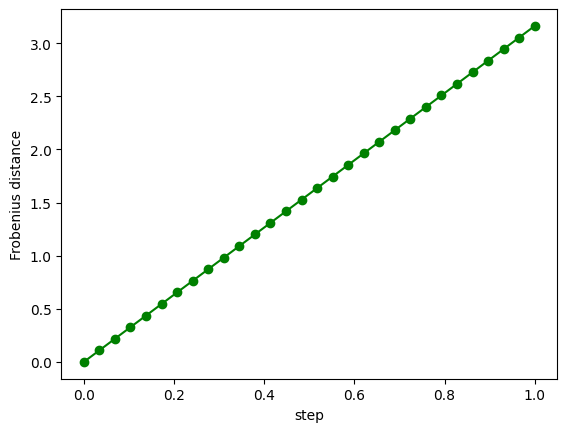

In [13]:
plt.plot(step, fro_dist, 'go-')
plt.xlabel('step')
plt.ylabel('Frobenius distance')
plt.show()

### (4) 행렬 원소 사이의 상관계수 계산 (Hint: `np.flatten()`)

In [14]:
X
X_shifting

[array([[-0.02645174,  0.84579571, -1.61118407,  0.64254589, -1.94105225,
          2.01799034, -0.60696498,  1.93919036,  0.21009621, -1.97998137],
        [-0.43619181,  0.90554303, -0.92429528, -0.41306059, -0.62397969,
         -0.27971716,  1.07400415, -0.14198605, -1.01241689, -1.18794342],
        [-0.96409613,  0.84630847, -1.27521084,  0.55055422, -0.45143262,
          0.88581441,  0.088643  , -0.30904767,  0.76203302,  0.40240714],
        [-0.87077957, -0.61445759, -0.2251405 ,  0.47399264, -1.2135523 ,
          0.13769057, -1.18914676, -0.3008917 , -0.50452622,  0.86833267],
        [ 0.09353677, -0.33583327, -0.92710231,  0.30190767,  1.82552434,
         -1.50048568, -0.14021998, -1.05943417, -0.49659334,  0.96613964],
        [ 0.84994101, -1.14034707, -0.83924831,  2.20959224,  0.7603428 ,
          0.5712976 , -0.40099209, -0.21627053,  2.45906449, -0.52524197],
        [-0.82410071, -0.96350968, -0.03532973, -0.86939771, -0.44833038,
         -1.49511736, -1.7685745

In [15]:
np.ndarray.flatten(X)

np.ndarray.flatten(X_shifting[0])

array([-0.02645174,  0.84579571, -1.61118407,  0.64254589, -1.94105225,
        2.01799034, -0.60696498,  1.93919036,  0.21009621, -1.97998137,
       -0.43619181,  0.90554303, -0.92429528, -0.41306059, -0.62397969,
       -0.27971716,  1.07400415, -0.14198605, -1.01241689, -1.18794342,
       -0.96409613,  0.84630847, -1.27521084,  0.55055422, -0.45143262,
        0.88581441,  0.088643  , -0.30904767,  0.76203302,  0.40240714,
       -0.87077957, -0.61445759, -0.2251405 ,  0.47399264, -1.2135523 ,
        0.13769057, -1.18914676, -0.3008917 , -0.50452622,  0.86833267,
        0.09353677, -0.33583327, -0.92710231,  0.30190767,  1.82552434,
       -1.50048568, -0.14021998, -1.05943417, -0.49659334,  0.96613964,
        0.84994101, -1.14034707, -0.83924831,  2.20959224,  0.7603428 ,
        0.5712976 , -0.40099209, -0.21627053,  2.45906449, -0.52524197,
       -0.82410071, -0.96350968, -0.03532973, -0.86939771, -0.44833038,
       -1.49511736, -1.76857451, -0.21628772, -0.54061018,  2.40

In [16]:
corr_list = []
for i in X_shifting:
  corr_list.append(np.corrcoef(np.ndarray.flatten(X), np.ndarray.flatten(i))[0, 1])

corr_list

[1.0,
 0.9999470574413355,
 0.9997882023791541,
 0.9995234694395533,
 0.9991529941296444,
 0.9986770125408633,
 0.9980958607868146,
 0.9974099741784238,
 0.9966198861405305,
 0.9957262268753349,
 0.9947297217794149,
 0.9936311896222262,
 0.9924315404951344,
 0.9911317735411344,
 0.9897329744763667,
 0.9882363129154542,
 0.9866430395135036,
 0.9849544829382982,
 0.9831720466868238,
 0.9812972057607566,
 0.9793315032159391,
 0.9772765466011465,
 0.9751340043016042,
 0.9729056018028073,
 0.9705931178901456,
 0.9681983807997002,
 0.9657232643353586,
 0.9631696839670795,
 0.960539592924735,
 0.9578349783014873]

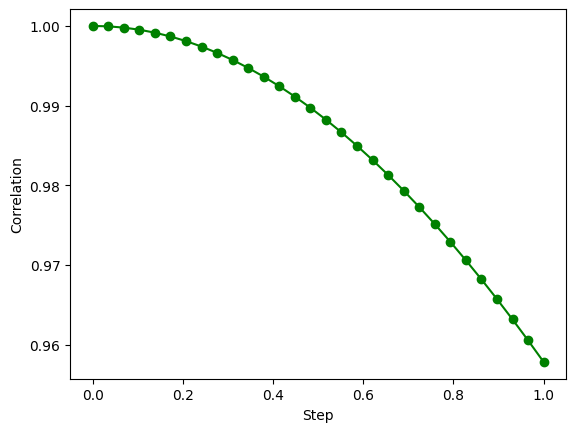

In [17]:
plt.plot(step, corr_list, 'go-')
plt.xlabel('Step')
plt.ylabel('Correlation')
plt.show()

### 전체 시각화 결과

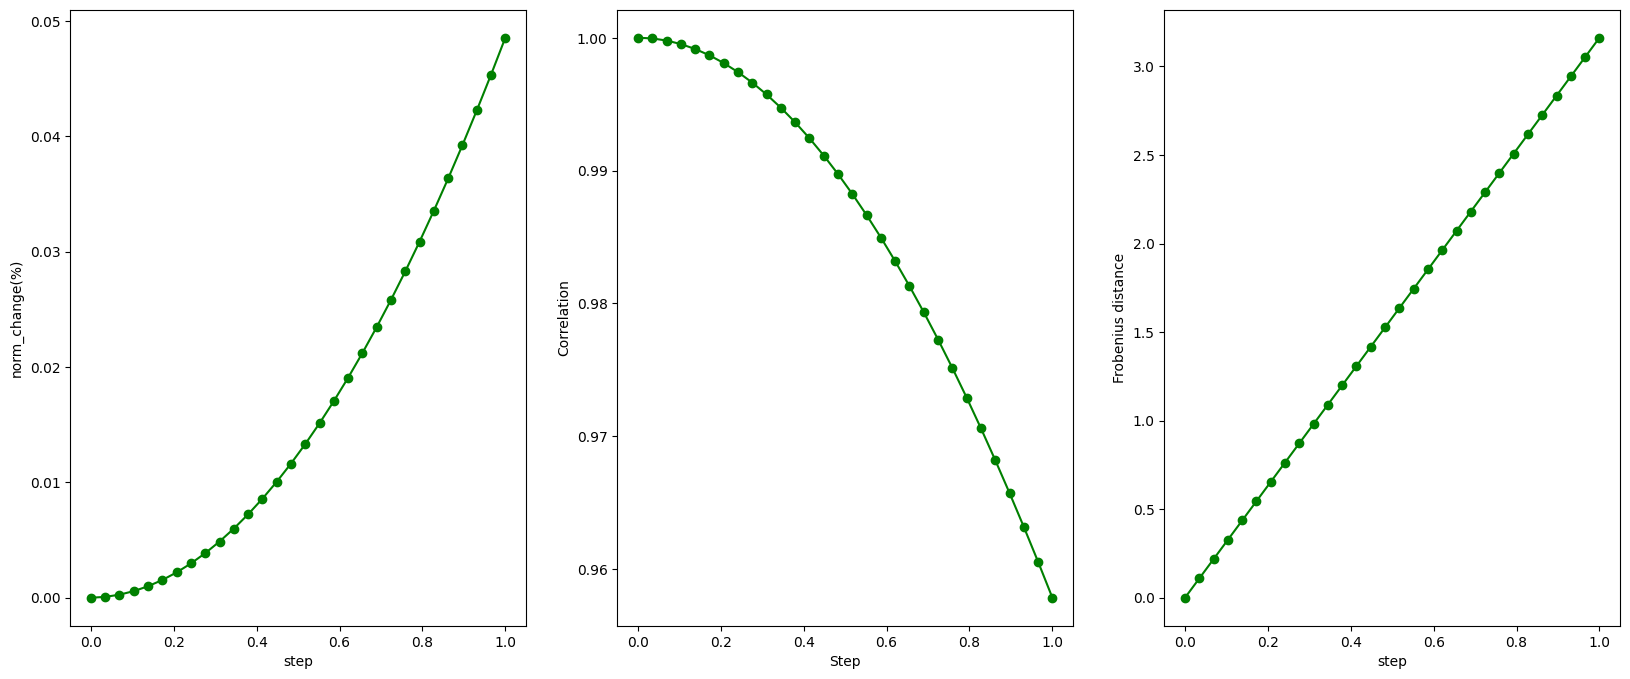

In [18]:
plt.figure(figsize=(20,8))

# 5-2
plt.subplot(1, 3, 1)
plt.plot(step, norm_change, 'go-')
plt.xlabel('step')
plt.ylabel('norm_change(%)')

# 5-4
plt.subplot(1, 3, 2)
plt.plot(step, corr_list, 'go-')
plt.xlabel('Step')
plt.ylabel('Correlation')

# 5-3
plt.subplot(1, 3, 3)
plt.plot(step, fro_dist, 'go-')
plt.xlabel('step')
plt.ylabel('Frobenius distance')
plt.show()

## [Problem 5-5]

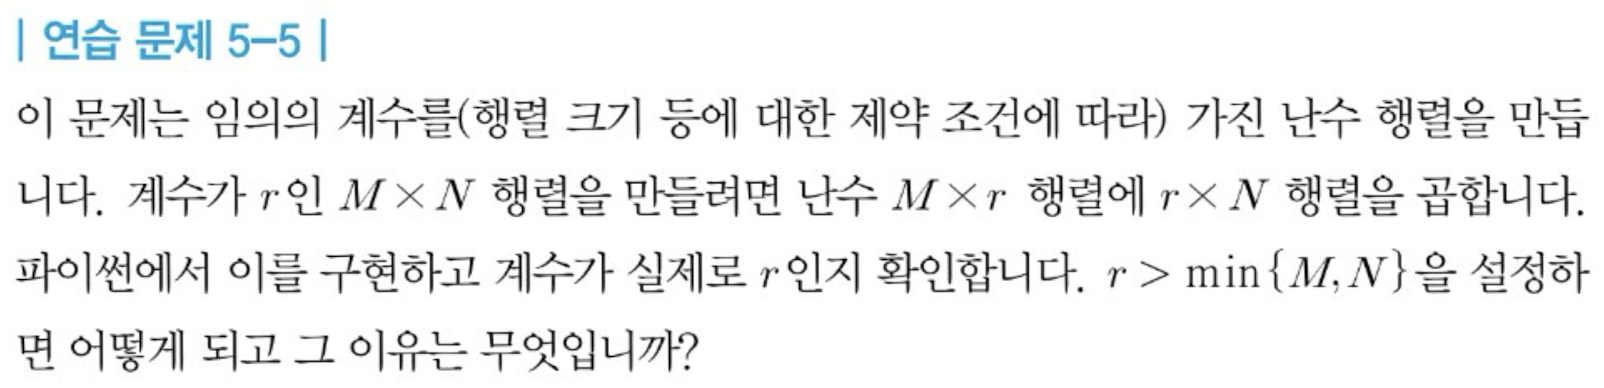

In [19]:
M = 5
r = 3
N = 4

In [20]:
A = np.random.randn(M, r)
A

array([[ 1.50158643,  0.7636997 , -0.54620031],
       [-0.5609594 ,  0.86806181,  0.37765435],
       [ 0.65570735, -0.11043724, -0.32077105],
       [-0.00704006, -1.57332313,  0.46757685],
       [-1.77946845, -0.34963793,  0.89581717]])

In [21]:
B = np.random.randn(r, N)
B

array([[-0.49672909, -0.40400882, -0.55474185,  1.14667306],
       [-0.33743433, -1.10289411,  1.21859884, -0.95275906],
       [ 0.00642092, -0.43853713,  0.28887015,  0.10677638]])

In [22]:
np.linalg.matrix_rank(A @ B) == r # 동일!

True

### 추가 설정
- $r>\text{min}\{M,N\}$

In [23]:
M = 5
r = 6
N = 4

In [24]:
A = np.random.randn(M, r)
B = np.random.randn(r, N)

np.linalg.matrix_rank(A @ B) == r # 동일 X

False

In [25]:
np.linalg.matrix_rank(A @ B)

4

## [Problem 5-6]

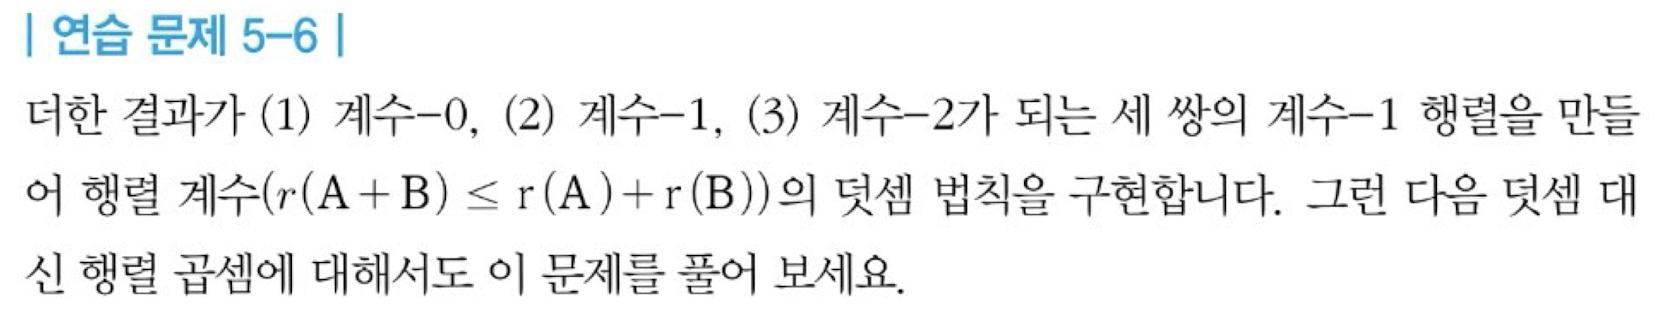

### (1-1) 더한 결과가 rank-0 matrix인 경우

In [26]:
A = np.array([[1, 2],
              [2, 4]])
B = np.array([[-1, -2],
              [-2, -4]])

print(f'Rank A: {np.linalg.matrix_rank(A)}')
print(f'Rank B: {np.linalg.matrix_rank(B)}')
print(f'Rank A+B: {np.linalg.matrix_rank(A+B)}')

Rank A: 1
Rank B: 1
Rank A+B: 0


### (1-2) 더한 결과가 rank-1 matrix인 경우

In [27]:
A = np.array([[1, 2],
              [2, 4]])
B = np.array([[1, 2],
              [2, 4]])

print(f'Rank A: {np.linalg.matrix_rank(A)}')
print(f'Rank B: {np.linalg.matrix_rank(B)}')
print(f'Rank A+B: {np.linalg.matrix_rank(A+B)}')

Rank A: 1
Rank B: 1
Rank A+B: 1


### (1-3) 더한 결과가 rank-2 matrix인 경우

In [28]:
A = np.array([[1, 2],
              [2, 4]])
B = np.array([[0, 6],
              [0, 10]])

print(f'Rank A: {np.linalg.matrix_rank(A)}')
print(f'Rank B: {np.linalg.matrix_rank(B)}')
print(f'Rank A+B: {np.linalg.matrix_rank(A+B)}')

Rank A: 1
Rank B: 1
Rank A+B: 2


### Rank 곱셈 법칙
- $r(A\cdot B) \leq \text{min}\{r(A), r(B) \}$

In [29]:
A = np.array([[-1, 1],
              [1, -1]])
B = np.array([[0, 1],
              [1, 0]])

print(f'Rank A: {np.linalg.matrix_rank(A)}')
print(f'Rank B: {np.linalg.matrix_rank(B)}')
print(f'Rank A@B: {np.linalg.matrix_rank(A@B)}')

Rank A: 1
Rank B: 2
Rank A@B: 1


In [30]:
A = np.array([[1, 2],
              [2, 4]])
B = np.array([[-2, 2],
              [1, -1]])

print(f'Rank A: {np.linalg.matrix_rank(A)}')
print(f'Rank B: {np.linalg.matrix_rank(B)}')
print(f'Rank A@B: {np.linalg.matrix_rank(A@B)}')

Rank A: 1
Rank B: 1
Rank A@B: 0


In [31]:
A = np.array([[1, 2],
              [2, 4]])
B = np.array([[0, 0],
              [0, 0]])

print(f'Rank A: {np.linalg.matrix_rank(A)}')
print(f'Rank B: {np.linalg.matrix_rank(B)}')
print(f'Rank A@B: {np.linalg.matrix_rank(A@B)}')

Rank A: 1
Rank B: 0
Rank A@B: 0


## [Problem 5-7]

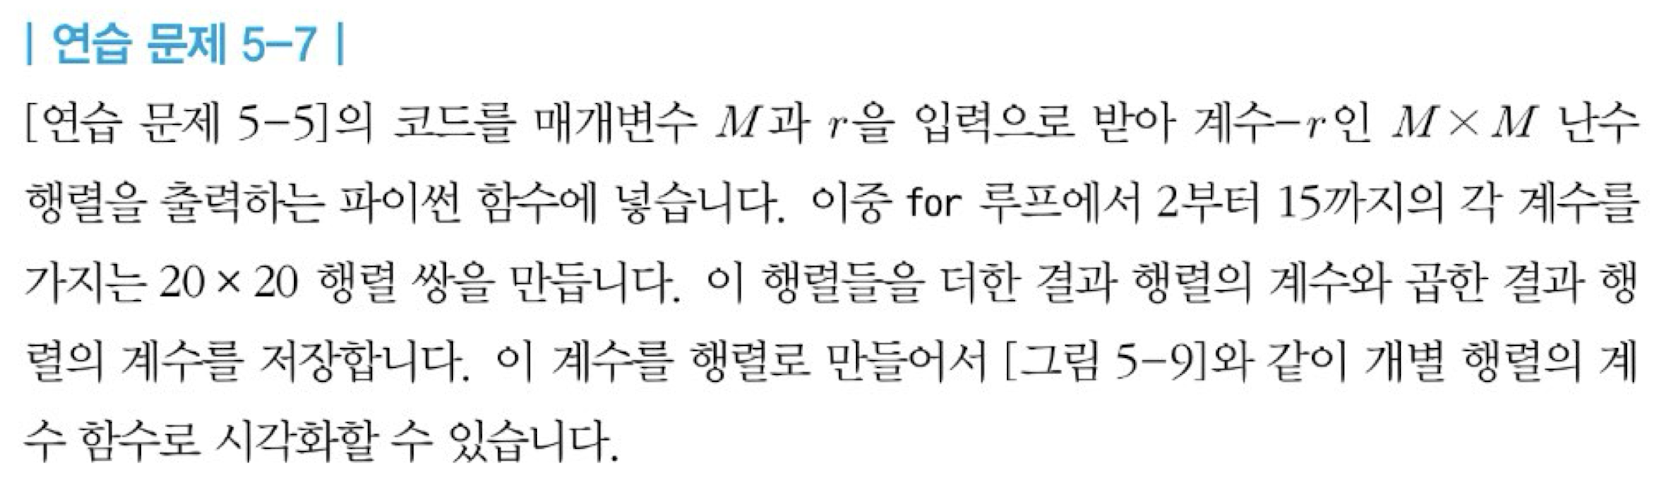

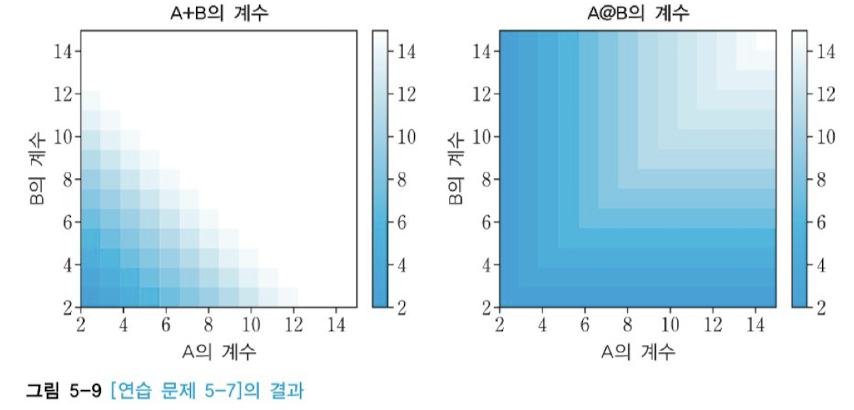

In [34]:
def gen_mat(M, r):
  X = np.random.randn(M, r) @ np.random.randn(r, M)
  return X

In [39]:
A = []
B = []

for i in range(2, 16):
  A.append(gen_mat(20, i))
  B.append(gen_mat(20, i))
# print(A, B)

In [59]:
result_plus = np.zeros((14, 14))
result_product = np.zeros((14, 14))

for i in range(len(A)):
  for j in range(len(B)):
    # print(np.linalg.matrix_rank(A[i] + B[j]))
    result_plus[14-i-1, j] = np.linalg.matrix_rank(A[i] + B[j])
    result_product[14-i-1, j] = np.linalg.matrix_rank(A[i] @ B[j])

print(result_plus)
print()
print(result_product)

[[17. 18. 19. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
 [16. 17. 18. 19. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
 [15. 16. 17. 18. 19. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
 [14. 15. 16. 17. 18. 19. 20. 20. 20. 20. 20. 20. 20. 20.]
 [13. 14. 15. 16. 17. 18. 19. 20. 20. 20. 20. 20. 20. 20.]
 [12. 13. 14. 15. 16. 17. 18. 19. 20. 20. 20. 20. 20. 20.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 20. 20. 20. 20.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 20. 20. 20.]
 [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 20. 20.]
 [ 8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 20.]
 [ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
 [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]]

[[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 14.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 13. 

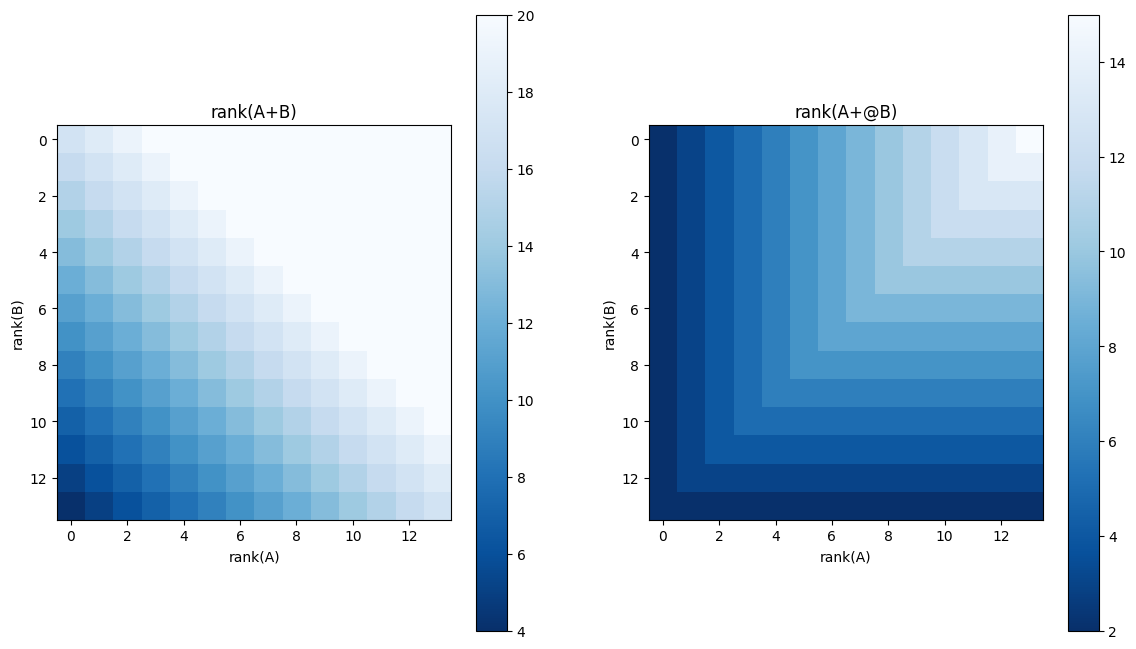

In [66]:
plt.figure(figsize = (14, 8))

plt.subplot(1, 2, 1)
plt.imshow(result_plus, cmap='Blues_r', interpolation='none')
plt.colorbar()  # 색상 바 추가
plt.title("rank(A+B)")
plt.xlabel("rank(A)")
plt.ylabel("rank(B)")

plt.subplot(1, 2, 2)
plt.imshow(result_product, cmap='Blues_r', interpolation='none')
plt.colorbar()  # 색상 바 추가
plt.title("rank(A+@B)")
plt.xlabel("rank(A)")
plt.ylabel("rank(B)")

plt.show()

## [Problem 5-8]

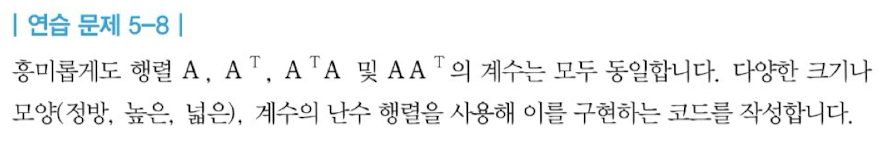

In [70]:
for m in range(2, 20):
  for n in range(2, 20):
    A = np.random.randn(m, n)

    print(f'm = {m}, n = {n}일 때,')
    print(f'A의 rank: {np.linalg.matrix_rank(A)}')
    print(f'A\'의 rank: {np.linalg.matrix_rank(A.T)}')
    print(f'A\'A의 rank: {np.linalg.matrix_rank(A @ A.T)}')
    print(f'AA\'의 rank: {np.linalg.matrix_rank(A.T @ A)}')

    print()

m = 2, n = 2일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 3일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 4일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 5일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 6일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 7일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 8일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 9일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 10일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 11일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 12일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 13일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 14일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 15일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA'의 rank: 2

m = 2, n = 16일 때,
A의 rank: 2
A'의 rank: 2
A'A의 rank: 2
AA

## [Problem 5-9]

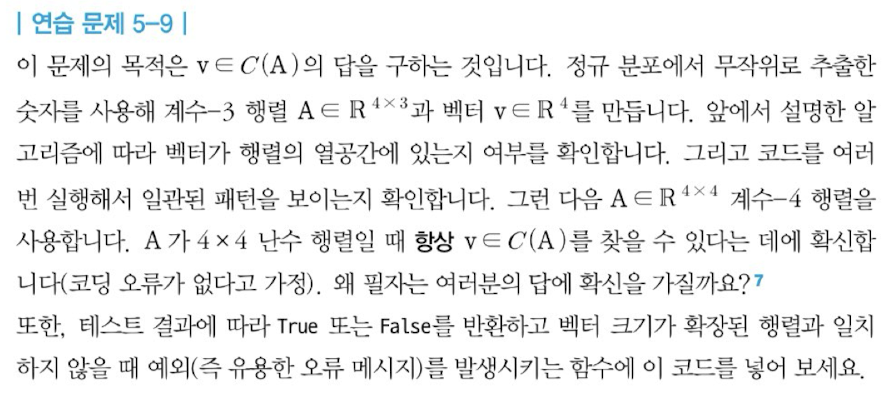

### rank-3

In [78]:
A = np.random.randn(4, 3)
# np.linalg.matrix_rank(A) == 3

v = np.random.randn(4, 1)
v

array([[-0.0842442 ,  0.22414721,  0.12737251],
       [ 0.44686843,  0.84595268, -0.31627059],
       [-0.21850199,  1.03737509,  0.90971136],
       [-1.19874176, -0.45794642, -0.01339578]])

In [79]:
A_tilde = np.hstack((A, v))
A_tilde

array([[-0.0842442 ,  0.22414721,  0.12737251, -0.17183219],
       [ 0.44686843,  0.84595268, -0.31627059, -0.06263808],
       [-0.21850199,  1.03737509,  0.90971136,  0.72154216],
       [-1.19874176, -0.45794642, -0.01339578, -0.88584816]])

In [96]:
for i in range(10):
    A = np.random.randn(4, 3)
    v = np.random.randn(4, 1)
    A_tilde = np.hstack((A, v))

    print(f'A =\n{A}\n\nv =\n{v}\n')
    result = 'v는 C(A)에 포함된다.' if np.linalg.matrix_rank(A_tilde)==np.linalg.matrix_rank(A) else 'v는 C(A)에 포함되지 않는다.'
    print(result)
    print()

A =
[[ 1.30468036 -1.45081147 -1.13701712]
 [ 0.43004943 -0.72576563 -1.59148276]
 [-0.00339207 -0.10461177  1.10248965]
 [-0.7616128  -1.34164558 -1.44682471]]

v =
[[ 0.52153594]
 [-0.55394242]
 [-1.0922111 ]
 [ 0.97522359]]

v는 C(A)에 포함되지 않는다.

A =
[[-0.2300106  -0.59895688  0.53395446]
 [ 0.41975973  2.50751987 -0.80578408]
 [-0.26260705  0.60138395  0.81606608]
 [-0.72646239 -0.16790621  1.00114043]]

v =
[[-0.19147507]
 [-2.7894553 ]
 [-1.59561611]
 [ 0.58540101]]

v는 C(A)에 포함되지 않는다.

A =
[[ 0.87979887 -0.0108284  -0.94691466]
 [-0.02633124  1.14215133 -0.61738435]
 [ 0.81609838 -0.61112736  0.44563921]
 [-1.18811902 -1.08668473 -0.85013967]]

v =
[[-0.02062043]
 [-0.05845998]
 [ 0.34714907]
 [-0.58266151]]

v는 C(A)에 포함되지 않는다.

A =
[[-0.98857398 -0.26463651 -1.3249112 ]
 [ 0.58157323  0.3559948   0.76210596]
 [ 0.19943885  1.46387638  0.54851312]
 [-0.49805493 -1.24759662 -1.47499449]]

v =
[[ 0.31093345]
 [-1.26901356]
 [-0.98382731]
 [-1.48421975]]

v는 C(A)에 포함되지 않는다.

A =
[[-2

In [101]:
# v in col(A)인 경우,
A = np.random.randn(4, 3)
v = A[:,0] + A[:,1] + A[:,2]
A_tilde = np.hstack((A, v.reshape(-1, 1))) # 코드 3번에서의 연산으로 인해 행벡터로 할당된 v를 열벡터로 변환하기 위해 reshape

print(f'A =\n{A}\n\nv =\n{v}\n')
result = 'v는 C(A)에 포함된다.' if np.linalg.matrix_rank(A_tilde)==np.linalg.matrix_rank(A) else 'v는 C(A)에 포함되지 않는다.'
print(result)
print()

A =
[[-1.51573694  1.05119033 -1.03494541]
 [ 1.23570896 -2.66504172 -1.12772613]
 [ 1.73019353  0.35343098 -0.55305019]
 [-1.12630676  0.23264227  0.90928309]]

v =
[-1.49949202 -2.55705889  1.53057431  0.01561861]

v는 C(A)에 포함된다.



### rank-4

In [94]:
for i in range(10):
    A = np.random.randn(4, 4)
    v = np.random.randn(4, 1)
    A_tilde = np.hstack((A, v))

    print(f'A =\n{A}\n\nv =\n{v}\n')
    result = 'v는 C(A)에 포함된다.' if np.linalg.matrix_rank(A_tilde)==np.linalg.matrix_rank(A) else 'v는 C(A)에 포함되지 않는다.'
    print(result)
    print()



A =
[[ 1.22460898  0.87375651 -0.95983026  1.4362449 ]
 [-0.17996742 -1.1527166   0.65317083  0.3874975 ]
 [-1.00352494  0.99088971 -0.40061975  0.53980097]
 [-2.44965829 -0.22712067 -0.76040102  1.56034447]]

v =
[[-0.02506931]
 [ 1.22511856]
 [ 1.12864313]
 [-0.73911543]]

v는 C(A)에 포함된다.

A =
[[-0.62313175 -0.09874898 -0.65536367 -0.66706993]
 [-0.12573387  0.41269408 -0.93912552 -0.28053866]
 [ 0.19801896 -1.30526285 -1.6284013   0.23344762]
 [-0.07811481  0.15519413 -0.78912726  0.74697026]]

v =
[[-0.85344222]
 [-1.12529841]
 [-0.74450732]
 [-0.21827066]]

v는 C(A)에 포함된다.

A =
[[-0.03620598 -0.07008022  0.6382675   1.49466085]
 [-0.34566684  0.6293688   1.33858129 -1.92770275]
 [ 0.3189073   0.173412   -2.47587378 -1.35735868]
 [-0.25952687 -0.24045333  0.99000697 -1.56445186]]

v =
[[ 0.7393068 ]
 [ 0.34485177]
 [ 0.50830108]
 [-1.50168333]]

v는 C(A)에 포함된다.

A =
[[-0.53598696 -1.41158199  0.40471036 -0.26515901]
 [ 0.35787206 -0.36113675  0.62333462 -0.64410477]
 [-0.33977     1.2

모든 경우에 대해서, $v \in C(A)$